- Medidas estatísticas
  - Medidas de tendência central
    - média, mediana, moda
  - Medidas de posição ou separatrizes
    - quartis, decis, percentis
  - Medidas de dispersão
    - Amplitude, variância, desvio padrão, coeficiente de variação
  - Variáveis aleatórias
    - Variância
    - Covariância
  - Correlação
  - Distribuição normal (Gauss)
    - Curtose
    - Skewness

In [2]:
from analytics_utils.lang import Lang
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

---

## Global variables

In [27]:
# Global variables
FIRST_QUARTILE = 0.25
THIRD_QUARTILE = 0.75

In [42]:
# Load headers of dataset
HEADERS = pd.read_csv(
    '/home/ferraz/dev/patricksferraz/desk/prediction-wind-speed-mp/confidential/headers.csv',
    header=None
).iloc[0]
display(HEADERS)

0            Dia
1            Mês
2            Ano
3           Hora
4     Velocidade
5        Direção
6    Temperatura
7        Umidade
8        Pressão
Name: 0, dtype: object

---

## Functions

In [36]:
def describe_data(
    data_frame: pd.DataFrame, lang: str = "en", headers: [str] = None
) -> pd.DataFrame:
    """This function describe the datas of a dataframe. Returning the max,
    min, mean, median, quantile, variance, standard deviation,
    mean absolute deviation, amplitude, root mean squared, kurtosis, skewness
    and count for all headers in dataframe

    Arguments:
        data_frame {pd.DataFrame} -- dataframe of input
        headers {[str]} -- chosen dataframe headers

    Keyword Arguments:
        lang {str} -- output language (default: {"pt"}).
        headers {[str]} -- chosen dataframe headers (default: {None}).

    Returns:
        pd.Dataframe -- dataframe with the descriptions
    """

    lang = Lang(lang)

    def _apply(header: str, column: []):
        _max = column.max()
        _min = column.min()
        _count = column.count()

        return {
            lang.word("header"): header,
            lang.word("max"): _max,
            lang.word("min"): _min,
            lang.word("mean"): column.mean(),
            lang.word("median"): column.median(),
            lang.phrase("quartile", "1"): column.quantile(FIRST_QUARTILE),
            lang.phrase("quartile", "3"): column.quantile(THIRD_QUARTILE),
            lang.word("var"): column.var(),
            lang.word("std"): column.std(),
            lang.word("mad"): column.mad(),
            lang.word("amp"): _max - _min,
            lang.word("rms"): sum((column.pow(2)) / (_count)) ** (1 / 2),
            lang.word("kurtosis"): column.kurtosis(),
            lang.word("skew"): column.skew(),
            lang.word("count"): _count,
            lang.word("nans"): column.isna().sum(),
        }

    if not headers:
        headers = data_frame.columns

    return pd.DataFrame(
        [_apply(_, data_frame.loc[:, _]) for _ in headers]
    ).set_index(lang.word("header"))

In [155]:
# Function for multi plot
def _mplot(data_frame, x_values=None, x_title=None, w=16, h=12):
    # Get column count
    length = data_frame.shape[1]

    if x_values:
        x_values = data_frame.loc[:, x_values]
    else:
        x_values = data_frame.index
        
    _, axs = plt.subplots(length, 1, figsize=(w,h), sharex=True)
    for idx, column in enumerate(data_frame):
        axs[idx].plot(x_values, data_frame.loc[:, column], label=column)
        axs[idx].set_title(column)
        axs[idx].set_ylabel(column)
        axs[idx].legend()

    # adds space between plots
    plt.tight_layout()
    plt.xlabel(x_title)
    plt.show()

---

## Read and plot dataset

In [142]:
# Read dataset
train = pd.read_csv(
    "/home/ferraz/dev/patricksferraz/desk/prediction-wind-speed-mp/confidential/train150.txt",
    delimiter="\t",
    header=None,
    names=HEADERS
)
test = pd.read_csv(
    "/home/ferraz/dev/patricksferraz/desk/prediction-wind-speed-mp/confidential/prev150.txt",
    delimiter="\t",
    header=None,
    names=HEADERS
)
df = pd.concat([train, test], ignore_index=True)
df = df.interpolate(method='cubic')
df_ndt = df.loc[:, "Velocidade":]

In [143]:
# Show dataset
display(df)

,Dia,Mês,Ano,Hora,Velocidade,Direção,Temperatura,Umidade,Pressão
0,30,11,2015,14,13.012139,75.105481,27.516129,72.930636,1020.422601
1,30,11,2015,15,12.726087,68.334332,27.238095,75.212121,1020.394348
2,30,11,2015,16,12.081111,64.457865,27.105263,75.741379,1020.508333
3,30,11,2015,17,11.647222,53.842100,26.305556,75.302632,1020.611000
4,30,11,2015,18,11.064444,53.945279,25.464286,76.592593,1020.866500
...,...,...,...,...,...,...,...,...,...
739,31,12,2015,9,7.370556,88.967009,25.545455,90.612500,1018.871167
740,31,12,2015,10,10.400556,89.474475,23.558442,91.142857,1018.303667
741,31,12,2015,11,12.400556,89.119129,23.369863,90.567376,1017.004667
742,31,12,2015,12,13.944444,85.945816,23.240741,88.645833,1016.574167


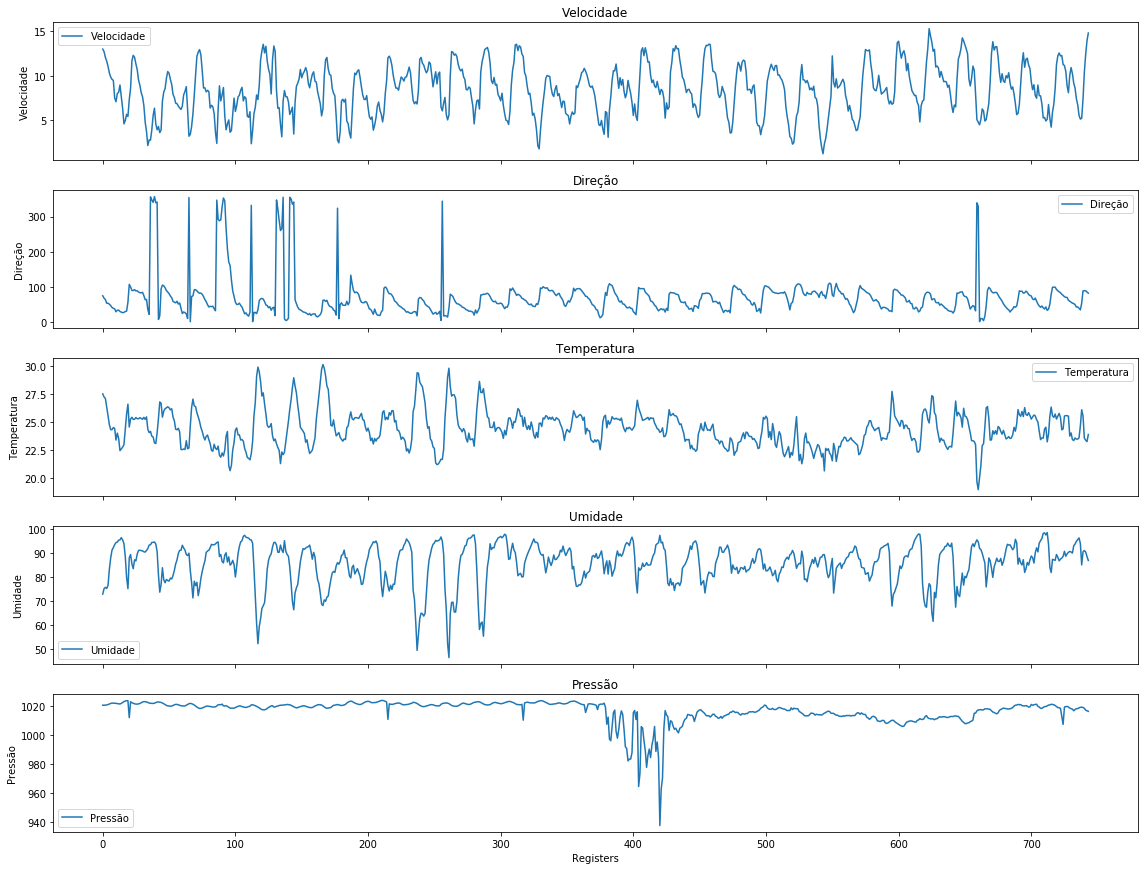

In [180]:
# Plot dataset
_mplot(df_ndt, x_title="Registers")

---

## Describe dataset

In [145]:
# Show dataset describe
display(describe_data(df_ndt))

,max,min,mean,median,1-quartile,3-quartile,variance,standard deviation,absolute deviation,amplitude,rms,kurtosis,skewness,count,NaNs
header,,,,,,,,,,,,,,,
Velocidade,15.313889,1.211905,8.440594,8.489167,6.498889,10.404306,7.586714,2.754399,2.245532,14.101984,8.878071,-0.583534,-0.064374,744,0
Direção,356.553715,1.448179,70.913340,59.891964,39.725962,83.353583,3464.189743,58.857368,32.925486,355.105536,92.131620,12.907184,3.402864,744,0
Temperatura,30.140625,18.936170,24.390728,24.309817,23.356368,25.370910,2.534736,1.592086,1.230401,11.204455,24.442564,1.080181,0.538987,744,0
Umidade,98.710843,46.355556,85.680048,87.350906,81.606481,91.520952,68.308641,8.264904,6.349837,52.355288,86.077218,2.108927,-1.237156,744,0
Pressão,1023.726500,937.534333,1016.543352,1019.163250,1014.022208,1021.024417,63.461228,7.966256,5.070307,86.192167,1016.574524,23.052438,-3.844125,744,0


---

## Boxplots

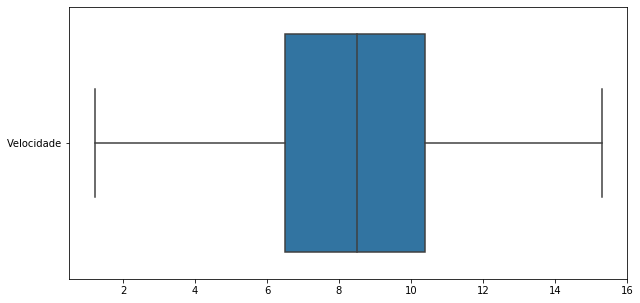

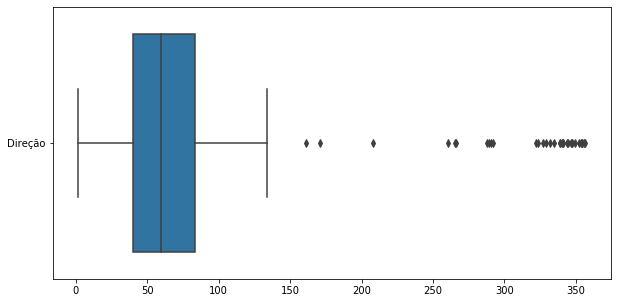

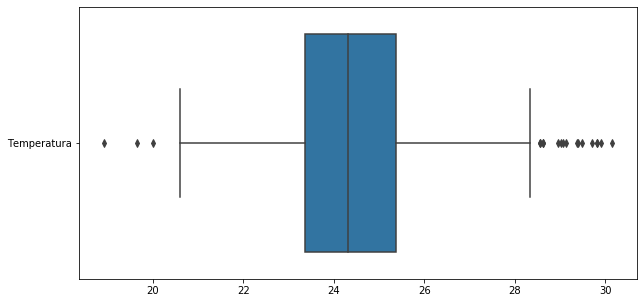

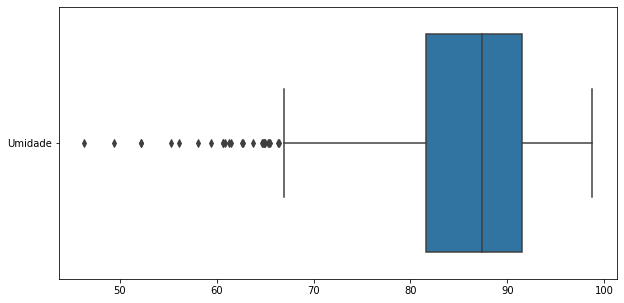

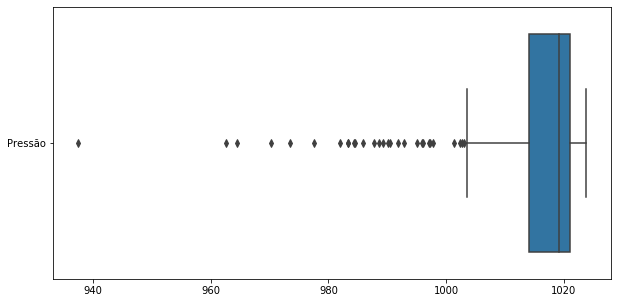

In [198]:
for v in df_ndt:
    _, ax1 = plt.subplots(1, 1, figsize=(10, 5))
    ax = sns.boxplot(data=df_ndt.loc[:,v:v], orient="h", ax=ax1)

---

## Correlate (Heatmap)

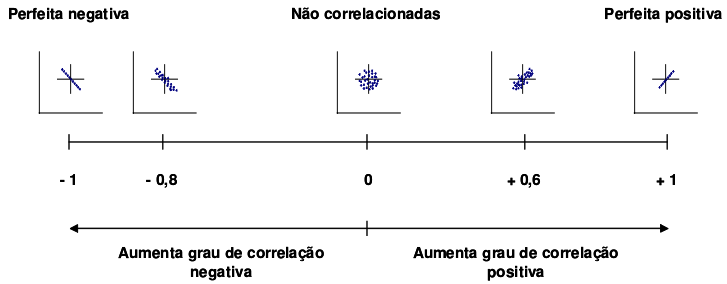

In [3]:
Image('imgs/correlate.png')

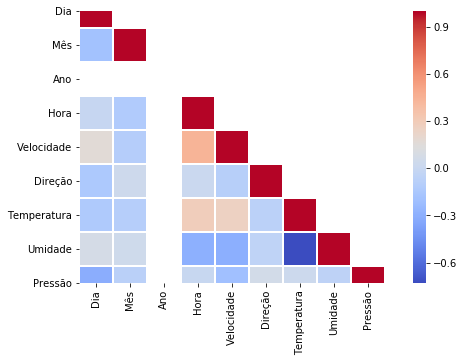

In [188]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True

_, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', square=True, linewidths=.5, ax=ax1)
# sns.distplot(df_goog.DailyReturn.dropna(), bins=100, ax=ax1)

---

## Normal distribution (Gaus)

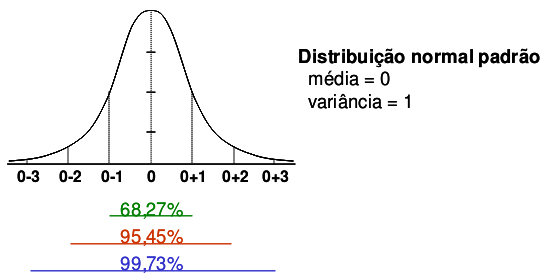

In [4]:
Image('imgs/dist.png')

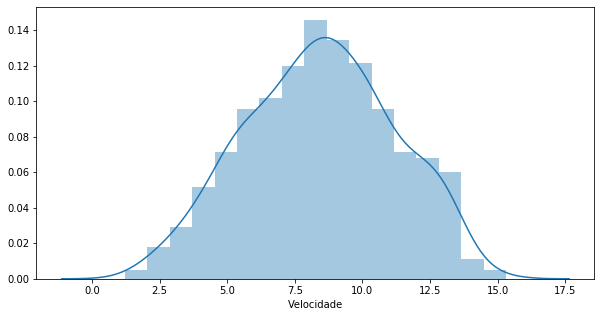

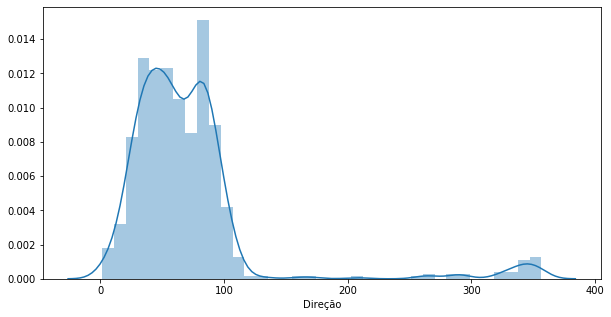

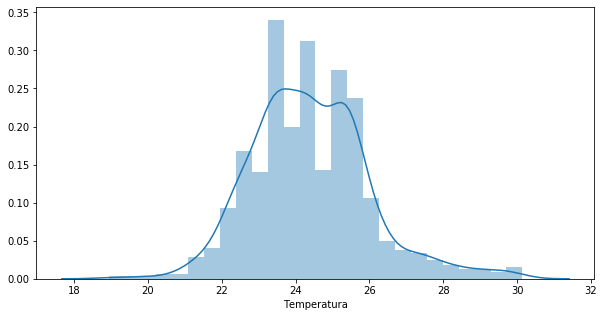

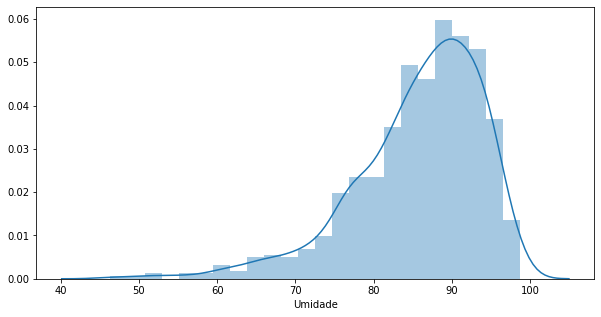

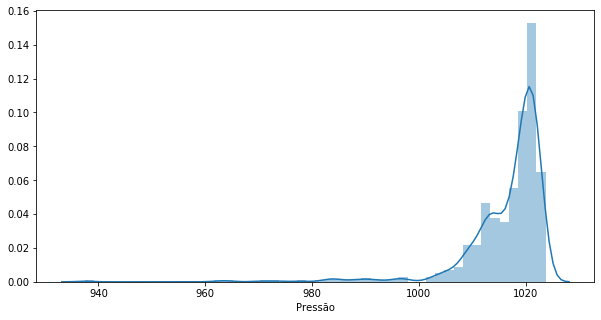

In [202]:
for v in df_ndt:
    _, ax1 = plt.subplots(1, 1, figsize=(10, 5))
    ax = sns.distplot(df_ndt.loc[:,v], ax=ax1)